<a href="https://colab.research.google.com/github/BhavikDudhrejiya/Data_Science/blob/main/Recursive_Feature_Selection_by_using_Tree_Based_and_Gradient_Based_Estimator.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Importing libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.feature_selection import RFE
from sklearn.metrics import accuracy_score
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.datasets import load_breast_cancer

In [ ]:
#Loading the data
data = load_breast_cancer()

In [ ]:
#Checking data attributes
data.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [ ]:
#Splitting data into X & y
X = pd.DataFrame(data.data, columns=data.feature_names)
y = data.target

#Checking the shape of the data
X.shape, y.shape

((569, 30), (569,))

In [ ]:
#Splitting data into train and test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

#Checking the shape of the data
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((455, 30), (455,), (114, 30), (114,))

# Feature selection by feature importance of random forest classifier

In [ ]:
#Feature selection by feature importance of random forest classifier
sel = SelectFromModel(RandomForestClassifier(n_estimators=100, random_state = 0, n_jobs=-1))

#Fitting a model on train data
sel.fit(X_train, y_train)

SelectFromModel(estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                                 class_weight=None,
                                                 criterion='gini',
                                                 max_depth=None,
                                                 max_features='auto',
                                                 max_leaf_nodes=None,
                                                 max_samples=None,
                                                 min_impurity_decrease=0.0,
                                                 min_impurity_split=None,
                                                 min_samples_leaf=1,
                                                 min_samples_split=2,
                                                 min_weight_fraction_leaf=0.0,
                                                 n_estimators=100, n_jobs=-1,
                                                 oob_score=False,
 

In [ ]:
#Checking the result
sel.get_support()

array([ True, False,  True,  True, False, False,  True,  True, False,
       False, False, False, False,  True, False, False, False, False,
       False, False,  True, False,  True,  True, False, False, False,
        True, False, False])

In [ ]:
#Checking count of important features
sel.get_support().sum()

10

In [ ]:
#Extracting the important features names
important_features = X_train.columns[sel.get_support()]
important_features

Index(['mean radius', 'mean perimeter', 'mean area', 'mean concavity',
       'mean concave points', 'area error', 'worst radius', 'worst perimeter',
       'worst area', 'worst concave points'],
      dtype='object')

In [ ]:
#Extracting the not important features names
non_important_features = X_train.columns[~sel.get_support()]
non_important_features

Index(['mean texture', 'mean smoothness', 'mean compactness', 'mean symmetry',
       'mean fractal dimension', 'radius error', 'texture error',
       'perimeter error', 'smoothness error', 'compactness error',
       'concavity error', 'concave points error', 'symmetry error',
       'fractal dimension error', 'worst texture', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst symmetry',
       'worst fractal dimension'],
      dtype='object')

In [ ]:
#Checking the feature importance of all the features
feature_importance = pd.DataFrame()
feature_importance['features'] = X_train.columns
feature_importance['feature_imp'] = sel.estimator_.feature_importances_
feature_importance.sort_values(by = 'feature_imp', ascending = False, inplace = True)
feature_importance.reset_index(drop=True, inplace=True)
feature_importance

,features,feature_imp
0,worst perimeter,0.172054
1,worst concave points,0.142027
2,worst radius,0.095563
3,mean concave points,0.086691
4,mean concavity,0.079866
5,mean perimeter,0.060164
6,worst area,0.050653
7,area error,0.038800
8,mean area,0.037145
9,mean radius,0.036996


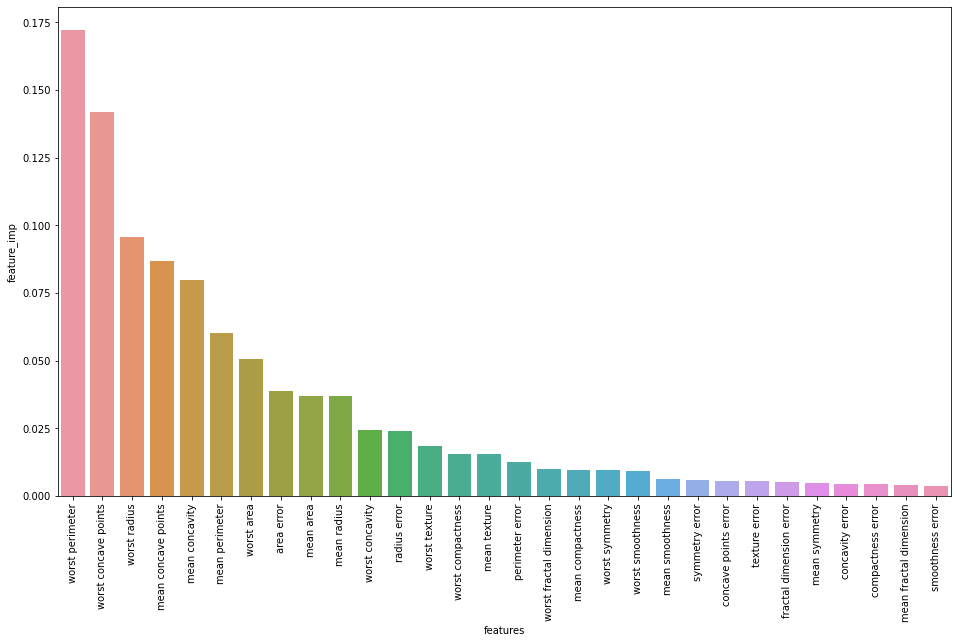

In [ ]:
#Visualizing the feature importance
plt.figure(figsize=(16,9))
sns.barplot(x = feature_importance.features,
            y = feature_importance.feature_imp);
plt.xticks(rotation = 90);

Important features are selected on the cut off of 0.03 if the feature importance values greater than 0.03

In [ ]:
#Removing the non importance features as per the tree based feature importance method
X_train_rfc = X_train[important_features]
X_test_rfc = X_test[important_features]

#Checking the shape of the data
X_train_rfc.shape, X_test_rfc.shape

((455, 10), (114, 10))

In [ ]:
#Creating function who train a model and extract accuracy
def rfc(X_train, X_test, y_train, y_test):
  rf = RandomForestClassifier(n_estimators=100, random_state=0, n_jobs=-1)
  rf.fit(X_train, y_train)
  y_pred = rf.predict(X_test)
  accuracy = accuracy_score(y_test, y_pred)
  return {'Accuracy':accuracy}

In [ ]:
%%time
#Train a model and extract accuracy on data have importance features based on tree based feature selection
rfc(X_train_rfc, X_test_rfc, y_train, y_test)

CPU times: user 291 ms, sys: 34.7 ms, total: 326 ms
Wall time: 360 ms


{'Accuracy': 0.9473684210526315}

In [ ]:
%%time
#Train a model and extract accuracy on original data
rfc(X_train, X_test, y_train, y_test)

CPU times: user 329 ms, sys: 27.8 ms, total: 357 ms
Wall time: 362 ms


{'Accuracy': 0.9649122807017544}

As We got maximum accuracy of 96% with 10 best features selected through feature importance

# Feature selection through Recursive Feature Elimination method

In [ ]:
#Creating Recursive Feature Elmination
sel_rfe = RFE(RandomForestClassifier(n_estimators=100, random_state=0, n_jobs=-1), n_features_to_select=15)

#Implementing on the data
sel_rfe.fit(X_train, y_train)

RFE(estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                     class_weight=None, criterion='gini',
                                     max_depth=None, max_features='auto',
                                     max_leaf_nodes=None, max_samples=None,
                                     min_impurity_decrease=0.0,
                                     min_impurity_split=None,
                                     min_samples_leaf=1, min_samples_split=2,
                                     min_weight_fraction_leaf=0.0,
                                     n_estimators=100, n_jobs=-1,
                                     oob_score=False, random_state=0, verbose=0,
                                     warm_start=False),
    n_features_to_select=15, step=1, verbose=0)

In [ ]:
#Checking the result of the RFE
sel_rfe.get_support()

array([ True,  True,  True,  True, False, False,  True,  True, False,
       False, False, False, False,  True, False, False, False, False,
       False, False,  True,  True,  True,  True,  True, False,  True,
        True,  True, False])

In [ ]:
#Checking the count of features which are important as per RFE
sel_rfe.get_support().sum()

15

In [ ]:
#Extracting importance features
imp_features = X_train.columns[sel_rfe.get_support()]
imp_features

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean concavity', 'mean concave points', 'area error', 'worst radius',
       'worst texture', 'worst perimeter', 'worst area', 'worst smoothness',
       'worst concavity', 'worst concave points', 'worst symmetry'],
      dtype='object')

In [ ]:
#Extracting not importance features
non_imp_features = X_train.columns[~sel_rfe.get_support()]
non_imp_features

Index(['mean smoothness', 'mean compactness', 'mean symmetry',
       'mean fractal dimension', 'radius error', 'texture error',
       'perimeter error', 'smoothness error', 'compactness error',
       'concavity error', 'concave points error', 'symmetry error',
       'fractal dimension error', 'worst compactness',
       'worst fractal dimension'],
      dtype='object')

In [ ]:
#Removing the not import features from the data
X_train_rfe = sel_rfe.transform(X_train)
X_test_rfe = sel_rfe.transform(X_test)

#Checking the shape of the data
X_train_rfc.shape, X_test_rfc.shape

((455, 10), (114, 10))

In [ ]:
%%time
#Train a model and extract accuracy on data have importance features based on tree based feature selection
rfc(X_train_rfe, X_test_rfe, y_train, y_test)

CPU times: user 270 ms, sys: 38.6 ms, total: 309 ms
Wall time: 353 ms


{'Accuracy': 0.9736842105263158}

In [ ]:
%%time
#Train a model and extract accuracy on original data
rfc(X_train, X_test, y_train, y_test)

CPU times: user 341 ms, sys: 21.7 ms, total: 362 ms
Wall time: 355 ms


{'Accuracy': 0.9649122807017544}

In [ ]:
#Looping the random forest with RFE with adding number of features
for index in range(1,31):
  sel = RFE(RandomForestClassifier(n_estimators=100, random_state=0, n_jobs=-1), n_features_to_select = index)
  sel.fit(X_train, y_train)
  X_train_rfe = sel.transform(X_train)
  X_test_rfe = sel.transform(X_test)
  print(index,'=',rfc(X_train_rfe, X_test_rfe, y_train, y_test))

1 = {'Accuracy': 0.8947368421052632}
2 = {'Accuracy': 0.9298245614035088}
3 = {'Accuracy': 0.9473684210526315}
4 = {'Accuracy': 0.9649122807017544}
5 = {'Accuracy': 0.9649122807017544}
6 = {'Accuracy': 0.956140350877193}
7 = {'Accuracy': 0.956140350877193}
8 = {'Accuracy': 0.9649122807017544}
9 = {'Accuracy': 0.9736842105263158}
10 = {'Accuracy': 0.9736842105263158}
11 = {'Accuracy': 0.9649122807017544}
12 = {'Accuracy': 0.9736842105263158}
13 = {'Accuracy': 0.9649122807017544}
14 = {'Accuracy': 0.9736842105263158}
15 = {'Accuracy': 0.9736842105263158}
16 = {'Accuracy': 0.9736842105263158}
17 = {'Accuracy': 0.9824561403508771}
18 = {'Accuracy': 0.9649122807017544}
19 = {'Accuracy': 0.9649122807017544}
20 = {'Accuracy': 0.9736842105263158}
21 = {'Accuracy': 0.9736842105263158}
22 = {'Accuracy': 0.9736842105263158}
23 = {'Accuracy': 0.9649122807017544}
24 = {'Accuracy': 0.9824561403508771}
25 = {'Accuracy': 0.956140350877193}
26 = {'Accuracy': 0.956140350877193}
27 = {'Accuracy': 0.96491

As We have got maximum accuracy 98% on 17th & 24th iteration

In [ ]:
#Running gradient boosting in RFE with 17 features to select 
sel = RFE(RandomForestClassifier(n_estimators=100, random_state=0, n_jobs=-1), n_features_to_select = 17)
#Implementing on the data
sel.fit(X_train, y_train)
#Removing not important features
X_train_rfe2 = sel.transform(X_train)
X_test_rfe12 = sel.transform(X_test)
#Train a model and extract accuracy on original data
rfc(X_train_rfe2, X_test_rfe12, y_train, y_test)

{'Accuracy': 0.9824561403508771}

# Feature selection by gradient boost tree importance

In [ ]:
#Creating Recursive Feature Elmination with gradient boosting classifier
sel_gbc = RFE(GradientBoostingClassifier(n_estimators=100, random_state=0), n_features_to_select=12)

#Implementing on the data
sel_gbc.fit(X_train, y_train)

RFE(estimator=GradientBoostingClassifier(ccp_alpha=0.0,
                                         criterion='friedman_mse', init=None,
                                         learning_rate=0.1, loss='deviance',
                                         max_depth=3, max_features=None,
                                         max_leaf_nodes=None,
                                         min_impurity_decrease=0.0,
                                         min_impurity_split=None,
                                         min_samples_leaf=1,
                                         min_samples_split=2,
                                         min_weight_fraction_leaf=0.0,
                                         n_estimators=100,
                                         n_iter_no_change=None,
                                         presort='deprecated', random_state=0,
                                         subsample=1.0, tol=0.0001,
                                         validation_frac

In [ ]:
#Checking the result of the RFE
sel_gbc.get_support()

array([False,  True, False, False,  True, False, False,  True,  True,
       False, False, False, False,  True, False, False,  True, False,
       False, False,  True,  True,  True,  True, False, False,  True,
        True, False, False])

In [ ]:
#Checking the count of features which are important as per RFE
sel_gbc.get_support().sum()

12

In [ ]:
#Extracting importance features
imp_features = X_train.columns[sel_gbc.get_support()]
imp_features

Index(['mean texture', 'mean smoothness', 'mean concave points',
       'mean symmetry', 'area error', 'concavity error', 'worst radius',
       'worst texture', 'worst perimeter', 'worst area', 'worst concavity',
       'worst concave points'],
      dtype='object')

In [ ]:
#Extracting non importance features
non_imp_features = X_train.columns[~sel_gbc.get_support()]
non_imp_features

Index(['mean radius', 'mean perimeter', 'mean area', 'mean compactness',
       'mean concavity', 'mean fractal dimension', 'radius error',
       'texture error', 'perimeter error', 'smoothness error',
       'compactness error', 'concave points error', 'symmetry error',
       'fractal dimension error', 'worst smoothness', 'worst compactness',
       'worst symmetry', 'worst fractal dimension'],
      dtype='object')

In [ ]:
#Removing the not import features from the data
X_train_gcb = sel_gbc.transform(X_train)
X_test_gcb = sel_gbc.transform(X_test)

#Checking the shape of the data
X_train_gcb.shape, X_test_gcb.shape

((455, 12), (114, 12))

In [ ]:
%%time
#Train a model and extract accuracy on data have importance features based on gradient boosting feature selection
rfc(X_train_gcb, X_test_gcb, y_train, y_test)

CPU times: user 371 ms, sys: 45.8 ms, total: 416 ms
Wall time: 460 ms


{'Accuracy': 0.9736842105263158}

In [ ]:
%%time
#Train a model and extract accuracy on original data
rfc(X_train, X_test, y_train, y_test)

CPU times: user 316 ms, sys: 35.5 ms, total: 351 ms
Wall time: 358 ms


{'Accuracy': 0.9649122807017544}

In [ ]:
for index in range(1,31):
  sel = RFE(GradientBoostingClassifier(n_estimators=100, random_state=0), n_features_to_select = index)
  sel.fit(X_train, y_train)
  X_train_rfe1 = sel.transform(X_train)
  X_test_rfe1 = sel.transform(X_test)
  print(index,'=',rfc(X_train_rfe1, X_test_rfe1, y_train, y_test))

1 = {'Accuracy': 0.8771929824561403}
2 = {'Accuracy': 0.9035087719298246}
3 = {'Accuracy': 0.9649122807017544}
4 = {'Accuracy': 0.9736842105263158}
5 = {'Accuracy': 0.9649122807017544}
6 = {'Accuracy': 0.9912280701754386}
7 = {'Accuracy': 0.9736842105263158}
8 = {'Accuracy': 0.9649122807017544}
9 = {'Accuracy': 0.9736842105263158}
10 = {'Accuracy': 0.956140350877193}
11 = {'Accuracy': 0.956140350877193}
12 = {'Accuracy': 0.9736842105263158}
13 = {'Accuracy': 0.956140350877193}
14 = {'Accuracy': 0.956140350877193}
15 = {'Accuracy': 0.9649122807017544}
16 = {'Accuracy': 0.956140350877193}
17 = {'Accuracy': 0.9649122807017544}
18 = {'Accuracy': 0.9473684210526315}
19 = {'Accuracy': 0.9649122807017544}
20 = {'Accuracy': 0.9473684210526315}
21 = {'Accuracy': 0.9649122807017544}
22 = {'Accuracy': 0.9649122807017544}
23 = {'Accuracy': 0.9649122807017544}
24 = {'Accuracy': 0.9649122807017544}
25 = {'Accuracy': 0.9736842105263158}
26 = {'Accuracy': 0.9736842105263158}
27 = {'Accuracy': 0.964912

On sixth iteration We have got 'Accuracy': 0.9912280701754386

In [ ]:
#Running gradient boosting in RFE with 6 number of features to select 
sel = RFE(GradientBoostingClassifier(n_estimators=100, random_state=0), n_features_to_select = 6)
#Implementing on the data
sel.fit(X_train, y_train)
#Removing not important features
X_train_rfe1 = sel.transform(X_train)
X_test_rfe1 = sel.transform(X_test)
#Train a model and extract accuracy on original data
rfc(X_train_rfe1, X_test_rfe1, y_train, y_test)

{'Accuracy': 0.9912280701754386}

As We got better accuracy of 99.12% with best features through gradient boosting estimator